# MHKiT Power Module  
This example will demonstrate the MHKiT Power Module functionality compute power, instantaneous frequency, and harmonics from time series of voltage and current. 

IN THE DATA SERIES BELOW WHAT ARE CHANNELS A,B,C?

In [2]:
import numpy as np
import pandas as pd
from mhkit import power, utils

# Read in timeseries data of voltage (V) and current (I)
data = pd.read_csv('data/2020224_181521_PowRaw.csv',skip_blank_lines=True,index_col='Time_UTC') 
# Convert the time index to type "datetime" 
data.index=pd.to_datetime(data.index)
# Display the data
data

,MODAQ_Va_V,MODAQ_Vb_V,MODAQ_Vc_V,MODAQ_Ia_I,MODAQ_Ib_I,MODAQ_Ic_I
Time_UTC,,,,,,
2020-02-24 18:15:21.499998208,10652.764496,-8499.446320,-1850.166138,-23.213654,19.219666,4.023438
2020-02-24 18:15:21.500018208,10691.122620,-8428.702576,-1927.626526,-23.404846,19.181671,4.289856
2020-02-24 18:15:21.500038209,10732.961151,-8364.997162,-2001.269318,-23.493042,19.033966,4.478912
2020-02-24 18:15:21.500058210,10775.892639,-8304.582245,-2071.241791,-23.680115,18.917847,4.858246
2020-02-24 18:15:21.500078210,10818.297028,-8248.074066,-2138.016785,-23.737946,18.702087,5.092468
...,...,...,...,...,...,...
2020-02-24 18:15:21.659899962,-11156.280273,3761.971924,7052.360229,24.501648,-8.213348,-16.351318
2020-02-24 18:15:21.659919962,-11136.750458,3657.195374,7126.638641,24.455872,-8.047028,-16.470337
2020-02-24 18:15:21.659939962,-11115.166504,3550.678619,7200.568237,24.535980,-7.887268,-16.733246


## Power Characteristics 
The MHKiT `power.characteristics` module can be used to compute basic quantities of interest from voltage and current time series. In this example we will calculate AC power and instantneous frequency using the loaded voltage and current timeseries.

Rebecca: Can you breifly describe what a power_factor is and reference the IEC if there is one for these functions?

[Text(0, 0.5, 'Power [W]'), Text(0.5, 0, 'Time')]

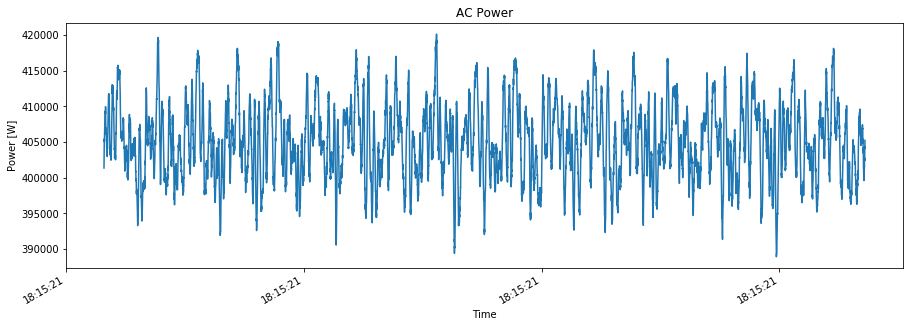

In [15]:
# First seperate the voltage and current timeseries into seperate dataFrames
voltage = data[['MODAQ_Va_V', 'MODAQ_Vb_V', 'MODAQ_Vc_V']]
current = data[['MODAQ_Ia_I','MODAQ_Ib_I','MODAQ_Ic_I']]

# Set the power factor for the system
power_factor = 0.96 

# Compute the instantaneous AC power in Watts
ac_power = power.characteristics.ac_power_three_phase(voltage, current, power_factor) 
# Display the result
ac_power.Power.plot(figsize=(15,5),title='AC Power').set(xlabel='Time',ylabel='Power [W]')

### Instantaneous Frequency

Using the 3 phase voltage readings we can compute the instantaneous frequency.

BREIFLY DESCRIBE THE INSTANTEOUS FREQUENCY

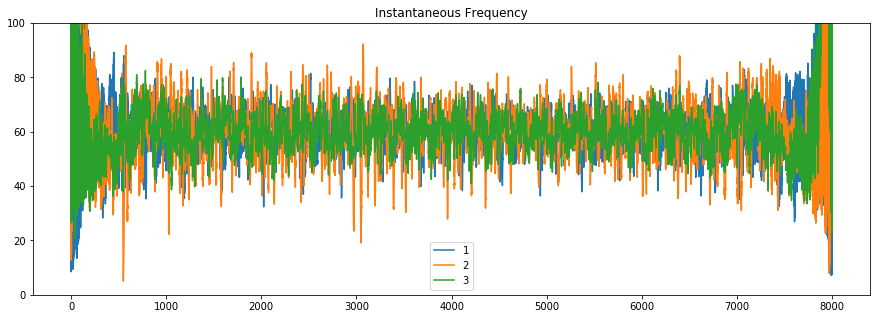

In [16]:
# Compute the instantaneous frequency
inst_freq = power.characteristics.instantaneous_frequency(voltage) 
# Display the result
inst_freq.plot(figsize=(15,5), ylim=(0,100),title='Instantaneous Frequency')

## WHAT ARE THE AXIS? x=seconds? y=Hz?

## Power Quality
The `power.quality` module can be used to compute harmonics of current and current distortions.

IS THIS BASED ON AND IEC STANDARD?

BREIFLY DESCRIBE THE HARMONICS AND PROVIDE A WHY I WANT TO CALCULATE THEM

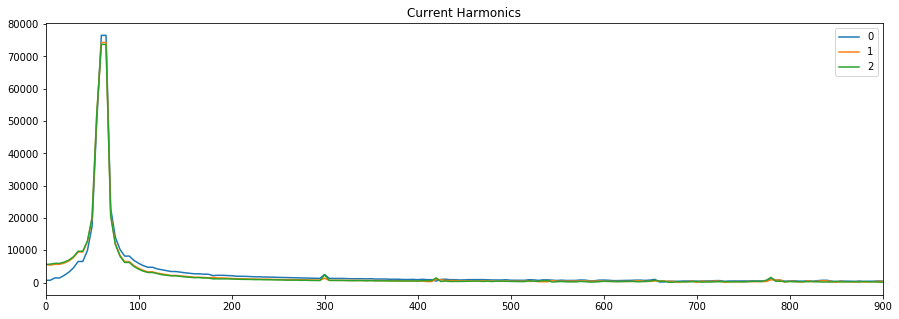

In [17]:
# Set the nominal sampling frequency
sample_freq = 50000   #[Hz]

# Set the frequency of the grid the device would be conected to
grid_freq = 60        #[Hz] 
rated_current = 18.8  # [Amps]

# Calculate the harmonics
harmonics = power.quality.harmonics(current, sample_freq, grid_freq)

# Display the results
harmonics.plot(figsize=(15,5),xlim=(0,900),title='Current Harmonics')

## WHAT ARE THE AXIS? x=frequency? y=?

### Harmonic Subgroups
Describe what the subgroups are and why we want to calculate them

The harmonic subgroups calculations are based on IEC TS 62600-30. We can clculate them using our grid frequency and harmonics.

In [19]:
# Calcualte Harmonic Subgroups
h_s=power.quality.harmonic_subgroups(harmonics,grid_freq) 
# Display the results
h_s.head()

,0,1,2
1,987.703268,7795.389201,7967.021150
61,119044.431599,117220.150789,116508.081331
121,7480.704280,5165.933181,4825.913942
181,4030.246664,2592.047198,2140.361043
241,2909.863158,1749.822139,1481.656536


### Total Harmonic Current Distortion

Compute the THCD from harmonic subgroups and rated current for the device

In [39]:
#Finally we can compute the total harmonic current distortion as a percentage 
THCD=power.quality.total_harmonic_current_distortion(h_s,rated_current) 
print('Channel  THCD')
print(THCD.to_string())

Channel  THCD
0    8.972511
1    6.096617
2    5.929491
